# Iris dataset

In [1]:
import dtreeviz
import numpy as np
import pandas as pd
import seaborn as sns

from dtreeviz.trees import *  # noqa: F403
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_theme(style='ticks')

## Loading data

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
y_names = iris.target_names[y]
print('Iris keys', iris.keys(), end='\n\n')
print('Description', iris.DESCR)

Iris keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Description .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== 

## Train and test split

In [3]:
iris_df = pd.DataFrame(np.c_[X, y], columns=np.append(iris.feature_names, 'species'))

In [4]:
XX = iris_df.loc[:, iris_df.columns != 'species']
yy = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=0, test_size=0.15)

## Plots

The scatter matrix plot of the petal and sepal lengths and widths reveals how these characteristics relate to each other individually and among the three species. A first look shows that **Setosa** has its exclusive own characteristics, while the species Versicolor and Virginica overlap more. The **Virginica** has greater sepals and petals than **Versicolor**, but there is an overlap between the smaller individuals from **Virginica** and the bigger ones from **Versicolor**.

The parallel coordinates plot makes it clear that the petal length and width are the most differentiating attributes. The **Setosa** species has the smallest petal length range (1 -- 2 cm) and petal width range (0 -- 1 cm).

It can be concluded that the petal characteristics are the most indicated attributes to classify the iris flowers. Additionally, it will be difficult to classify using sepals since the three species overlap in most of the sepal's ranges.


### Scatter matrix

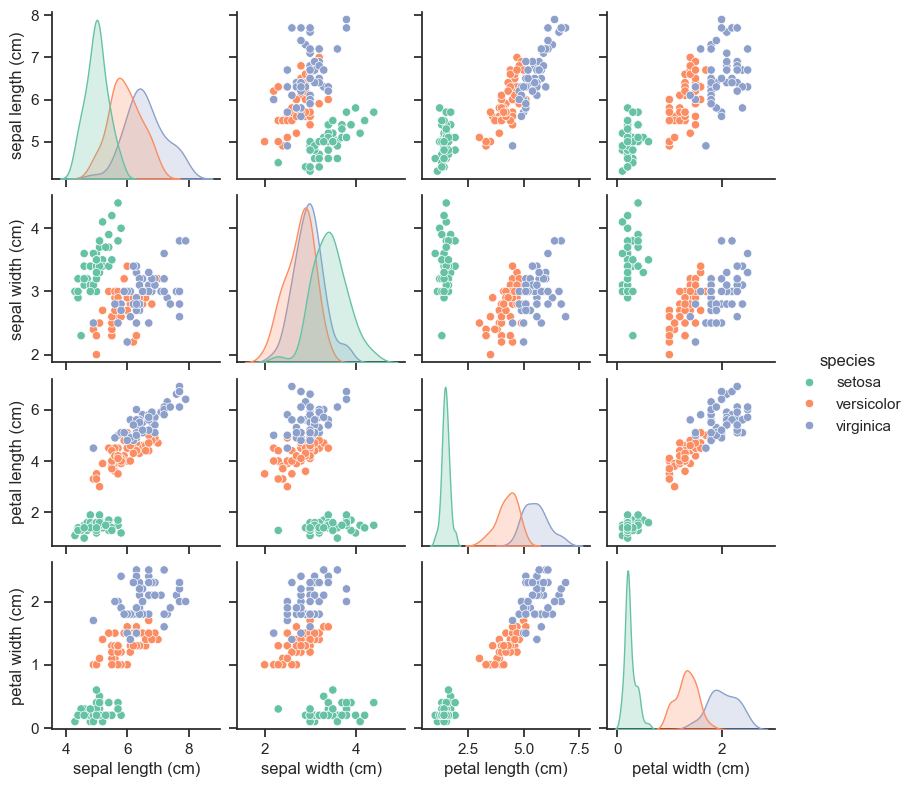

In [5]:
iris_df_plot = iris_df.copy()
iris_df_plot['species'] = y_names

sns.pairplot(iris_df_plot, hue='species', palette='Set2', height=2)

### Parallel coordinates

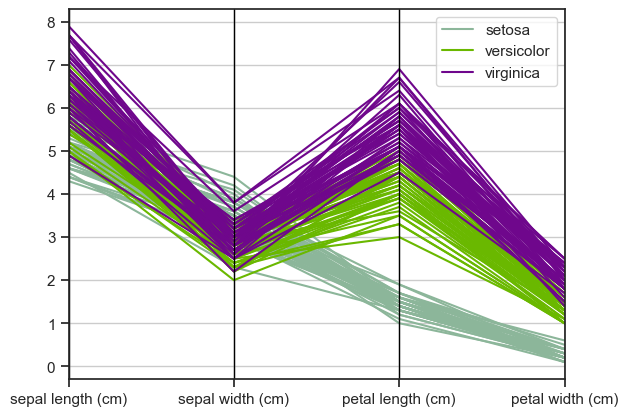

In [6]:
ax3 = pd.plotting.parallel_coordinates(iris_df_plot, 'species')

## Decision Tree

In [12]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=5)
tree_iris.fit(X_train, y_train)
print(tree_iris.score(X_train, y_train))

0.968503937007874


In [13]:
y_pred = tree_iris.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [14]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(cnf_matrix, index=iris.target_names, columns=iris.target_names)
print(cnf_table)

            setosa  versicolor  virginica
setosa           7           0          0
versicolor       0          11          0
virginica        0           0          5


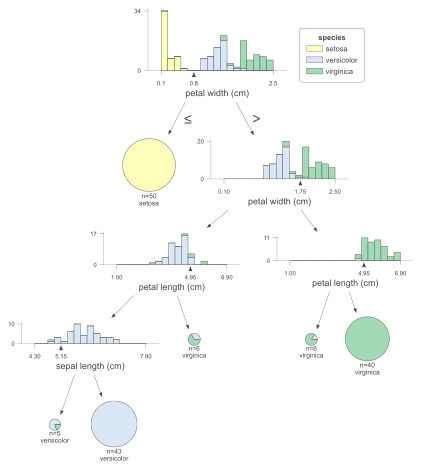

In [15]:
tree_iris.fit(X, y)
viz = dtreeviz.model(tree_iris, X, y, target_name='species', class_names=iris.target_names, feature_names=iris.feature_names)
viz.view()


## Results

The iris flower could be successfully classified according to its petal and sepal width and length. The generated decision tree shows that the petal width is the most relevant characteristic, since if the size is smaller than 0.8 cm, the flower can be directly classified as **Iris-setosa**. If the petal width is greater than 0.8 cm, then one should check if it is greater or smaller than 1.75 cm. Wether the petal width is greater or smaller than 1.75 cm, the petal length now should be verified.

If petal width and length is greater than 1.75 cm and 4.95, respectively, there is a 100% chance that it is **Iris-virginica**. But, if the petal length is smaller than 4.95 cm it can also be **Iris-virginica**, but there is a small chance to be **Irisi-versicolor**.

On the other hand, if the petal width is smaller than 1.75 cm, one should again check if petal length is smaller or greater than 4.95 cm. If it is greater, it is likely **Iris-virginica**, but there is also chance to be **Iris-versicolor**. However, if it is smaller than 4.95 cm, then the sepal length should be checked. If it is greater than 5.15 cm, it is **Iris-versicolor**. If smaller, it is likely to be also **Iris-versicolor** but there is a small chance to be **Iris-virginica**.


## Conclusions

The petal width and length are the main attributes to classify the iris flowers. The sepal is only used after 3 previous classification using the petal. The decision tree model had maximum accuracy, perfect confusion matrix. The precision and recall were also maximum, which means that there were no false positives or negatives when testing the model with test subset of the dataset.